# Ookla Internet Speed Trends: Fixed Vs Mobile

In [3]:

import pandas as pd
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool

DATA_DIR = "../../data/processed_data/"

In [13]:
fixed_pop_weighted = pd.read_csv(str(DATA_DIR) + "algeria_pop_weighted_trends_2019_2025_fixed.csv")
mobile_pop_weighted = pd.read_csv(str(DATA_DIR) + "algeria_pop_weighted_trends_2019_2025_mobile.csv")

fixed = pd.read_csv(str(DATA_DIR) + "algeria_national_trends_fixed.csv")
mobile = pd.read_csv(str(DATA_DIR) + "algeria_national_trends_mobile.csv")

fixed_subnational = pd.read_csv(str(DATA_DIR) + "algeria_subnational_trends_fixed.csv")
mobile_subnational = pd.read_csv(str(DATA_DIR) + "algeria_subnational_trends_fixed.csv")

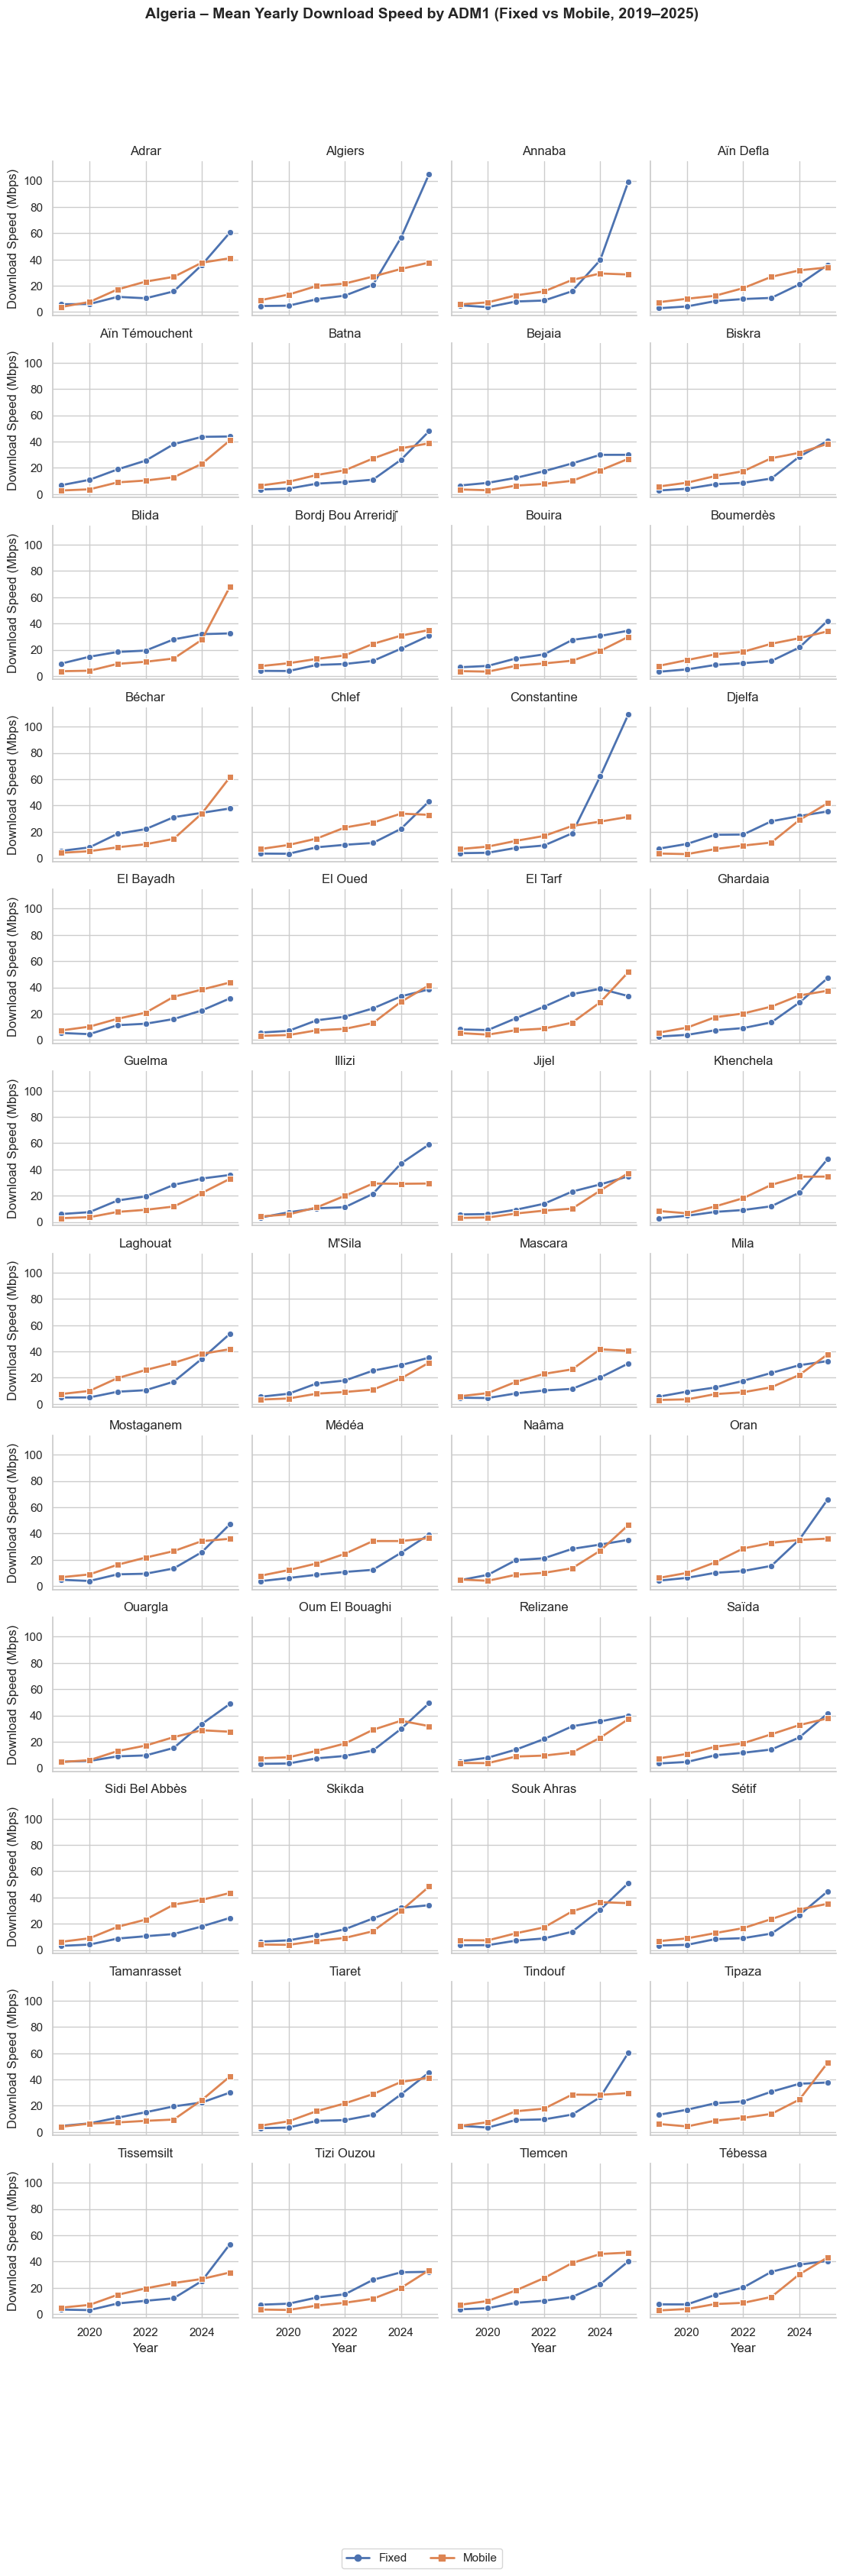

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load both fixed and mobile data
df_fixed = pd.read_csv(str(DATA_DIR) + "algeria_subnational_trends_fixed.csv")
df_mobile = pd.read_csv(str(DATA_DIR) + "algeria_subnational_trends_mobile.csv")

# Filter to ADM1 and add year column
adm1_fixed = df_fixed[df_fixed["admin_level"] == "ADM1"].copy()
adm1_fixed["year"] = adm1_fixed["date"].str.slice(0, 4).astype(int)
adm1_fixed["connection_type"] = "Fixed"

adm1_mobile = df_mobile[df_mobile["admin_level"] == "ADM1"].copy()
adm1_mobile["year"] = adm1_mobile["date"].str.slice(0, 4).astype(int)
adm1_mobile["connection_type"] = "Mobile"

# Combine both datasets
adm1_combined = pd.concat([adm1_fixed, adm1_mobile], ignore_index=True)

# Aggregate by admin_name, year, and connection_type
yearly = (adm1_combined.groupby(["admin_name", "year", "connection_type"], as_index=False)
                       [["avg_download_mbps", "avg_upload_mbps"]]
                       .mean()
                       .rename(columns={"avg_download_mbps": "download_mbps", 
                                       "avg_upload_mbps": "upload_mbps"}))

sns.set_theme(style="whitegrid")
g = sns.FacetGrid(yearly.sort_values("admin_name"),
                  col="admin_name", col_wrap=4, height=2.8, sharey=True)
g.map_dataframe(sns.lineplot, x="year", y="download_mbps", hue="connection_type", 
                style="connection_type", markers=["o", "s"], dashes=False, linewidth=2, legend=False)
g.set_axis_labels("Year", "Download Speed (Mbps)")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.92, bottom=0.08)
g.fig.suptitle("Algeria – Mean Yearly Download Speed by ADM1 (Fixed vs Mobile, 2019–2025)", 
               fontsize=14, weight="bold")

# Add single legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='C0', marker='o', linewidth=2, label='Fixed'),
    Line2D([0], [0], color='C1', marker='s', linewidth=2, label='Mobile')
]
g.fig.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.02), 
             ncol=2, frameon=True)

plt.show()
